# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

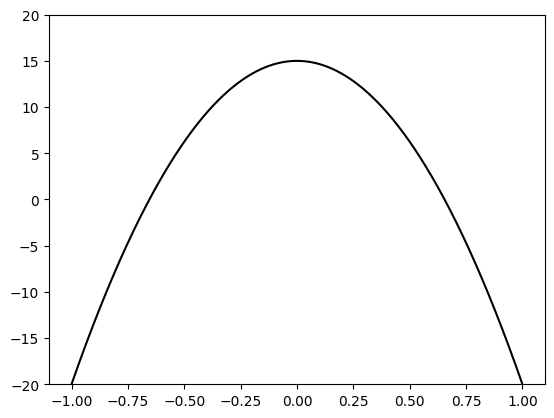

In [3]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

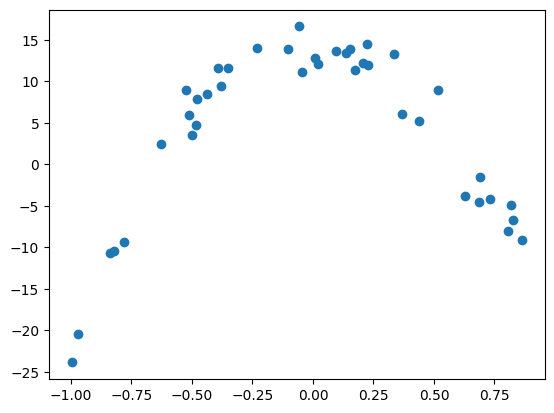

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))

    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [11]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [12]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.46972149459547063
Testing error (rmse): 3939331.749837222


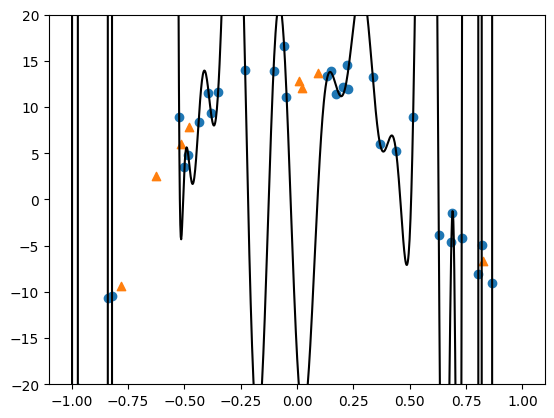

Polynomial coefficients
[-16.785780138253237, -456.12926738808716, 6889.874924784742, 56706.19949194744, -596091.4597111958, -1983362.2826864512, 20764298.87540369, 29277026.518930804, -361669211.43296164, -181338624.04278407, 3550884847.2613077, -49916224.38387813, -20604542315.35074, 7108078082.635235, 69749033049.64052, -39979355939.043, -123599770027.74582, 89964245108.3559, 67627635585.137634, -50174500515.506035, 70105801444.58492, -78738005077.62866, -22137863727.838463, 11437857835.504597, -58139852434.81095, 77092875066.33833, -40292174969.39253, 69910119174.63193, -11894254547.281681, 21166107601.79283, 7487674788.809375, -27279206238.700462, 18419038303.585533, -54083940057.84511, 25571344773.032536, -57782321388.98251, 30828185956.780285, -46449356115.02679, 33595354385.43837, -29342173027.71621, 32861425158.435635, -13016779033.773813, 28422896537.75699, -679193766.377167, 21025046968.790524, 6989586796.609998, 11953301337.384806, 10704678933.649302, 2550966401.0331507, 11

In [13]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [16]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg =linear_model.Lasso(alpha=0.01)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

Training error (rmse): 2.0294862132740077
Testing error (rmse): 1.4099177557361546


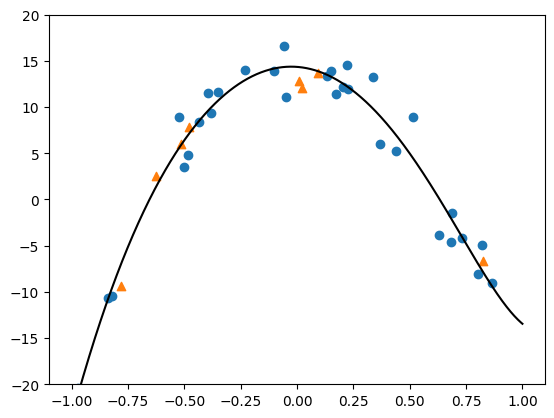

Polynomial coefficients
[14.350292333656665, -1.7923646024234212, -34.66352135555074, 0.0, 0.0, 5.8271072968722155, 0.0, 1.0523392155685285, 1.7739888033469906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0,

In [17]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [18]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg =linear_model.Ridge(alpha=0.01)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.01)

Training error (rmse): 1.9924608923763267
Testing error (rmse): 1.2952361882982908


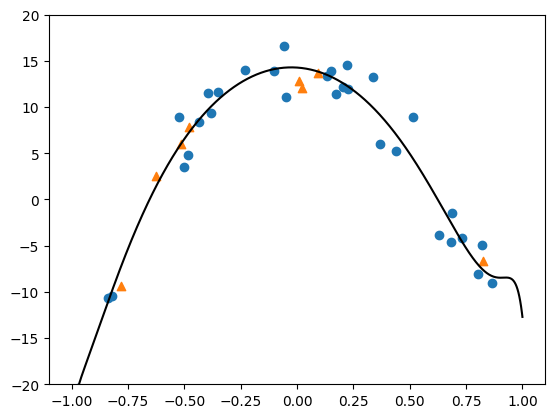

Polynomial coefficients
[14.276174781285386, -1.6093195516282606, -32.18579374916453, -0.9395968671882713, -8.699521680819757, 2.9345894923377926, 2.5317854574803107, 4.378585318700786, 4.85619245588714, 3.6407351131976284, 4.062033791724781, 2.178806363263071, 2.5987639250331616, 0.8471504091919186, 1.3080442169434177, -0.08196692999760913, 0.3886779340595137, -0.6191667196066213, -0.18709610554282463, -0.8640709316570288, -0.5057429169013528, -0.920133866827566, -0.6517357880938395, -0.8678524496043494, -0.6906012861859558, -0.7621186177601942, -0.6680795967929338, -0.6372159029774345, -0.6140587872827759, -0.5128891404856866, -0.5470506253692466, -0.3993847500203884, -0.47789535406003125, -0.30109737477765464, -0.4124820803567175, -0.21902196111424743, -0.35362496666305, -0.1523231278757624, -0.30230639224401656, -0.0992984396013501, -0.2584756551428029, -0.05794397389017014, -0.2215475682558683, -0.026267673703106453, -0.19070387715407655, -0.002447685604368033, -0.1650680258715464

In [19]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [20]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.094882,13.693419,1.724728e+00,13.868214,13.832242
1,-0.479015,7.824063,4.117492e+00,7.106986,7.249248
2,-0.626541,2.515293,1.717008e+05,1.305634,1.340538
3,-0.781884,-9.367806,1.114078e+07,-7.082601,-7.355247
4,0.022549,12.087957,-2.308060e+01,14.292250,14.223507
5,0.826022,-6.653701,7.298084e+03,-7.880143,-7.638362
6,0.009374,12.810729,-2.041404e+01,14.330445,14.258261
7,-0.512178,5.980816,-4.057279e+00,5.968431,6.105280


### Real Example (Predict fuel efficiency)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [23]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [24]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [25]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [26]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [27]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
